# **Exploratory Data Analysis**

## Objectives

* Conduct broad analysis on cleaned dataset and create initial visualisations

## Inputs

* This notebook will use the cars_processed.csv dataset

## Outputs

* I plan to generate a diverse set of initial visualisations


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\jackr\\OneDrive\\Desktop\\my_projects\\Hackathon-1\\car-price-analysis-hackathon-team4\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\jackr\\OneDrive\\Desktop\\my_projects\\Hackathon-1\\car-price-analysis-hackathon-team4'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px


In [5]:
cars_df = pd.read_csv('Data/clean/cars_processed.csv')
cars_df.head()


,car_ID,brand,model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,power_to_weight,car_volume,mpg_ratio,is_luxury,city_score,outdoor_score,sport_score,city_score_normalized,outdoor_score_normalized,sport_score_normalized
0,1,alfa-romeo,giulia,3,gas,standard,2,convertible,Rear Wheel Drive,front,...,0.043564,528019.904,0.777778,0,3.420573,2.224953,2.636124,0.060223,0.156132,0.209142
1,2,alfa-romeo,stelvio,3,gas,standard,2,convertible,Rear Wheel Drive,front,...,0.043564,528019.904,0.777778,0,3.420573,2.224953,2.636124,0.060223,0.156132,0.209142
2,3,alfa-romeo,quadrifoglio,1,gas,standard,2,hatchback,Rear Wheel Drive,front,...,0.054552,587592.640,0.730769,0,3.701659,2.925203,3.443046,0.119526,0.328387,0.370500
3,4,audi,100ls,2,gas,standard,4,sedan,Front Wheel Drive,front,...,0.043646,634816.956,0.800000,0,5.705352,3.694203,4.023528,0.542260,0.517553,0.486578
4,5,audi,100ls,2,gas,standard,4,sedan,Four Wheel Drive,front,...,0.040722,636734.832,0.818182,1,5.573226,3.894204,4.412435,0.514384,0.566752,0.564347


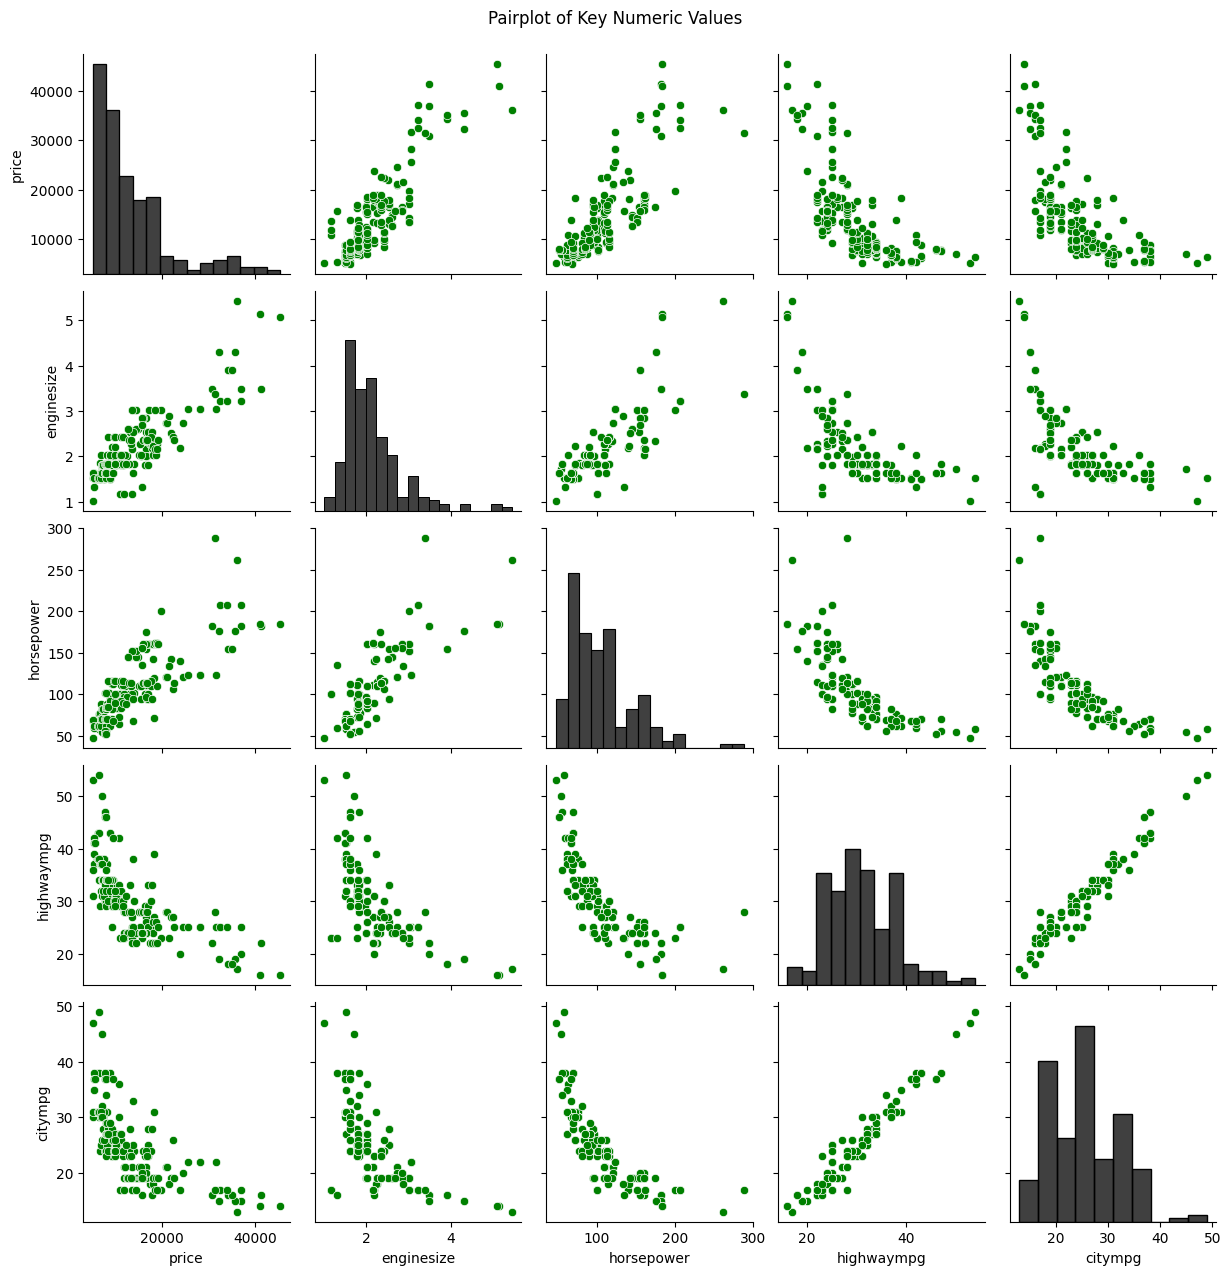

In [6]:
 # seaborn pairplot for price, enginesize, horsepower, highwaympg, citympg
sns.pairplot(
    cars_df[['price', 'enginesize', 'horsepower', 'highwaympg', 'citympg']],
    diag_kind='hist',
    plot_kws={'color': 'green'},
    diag_kws={'color': 'black'}
)
plt.suptitle('Pairplot of Key Numeric Values', y=1.02) 
plt.show()                                  

# The pairplot above provides several insights:
- There is a positive correlation between engine size, horsepower, and price, indicating that cars with larger engines and more horsepower tend to be more expensive.
- Highway and city MPG are negatively correlated with engine size and horsepower, suggesting that more powerful cars are less fuel efficient.
- The relationships between these variables appear mostly linear, with some outliers present.
- The distribution of price is right-skewed, with most cars clustered at lower price points and a few high-priced outliers.

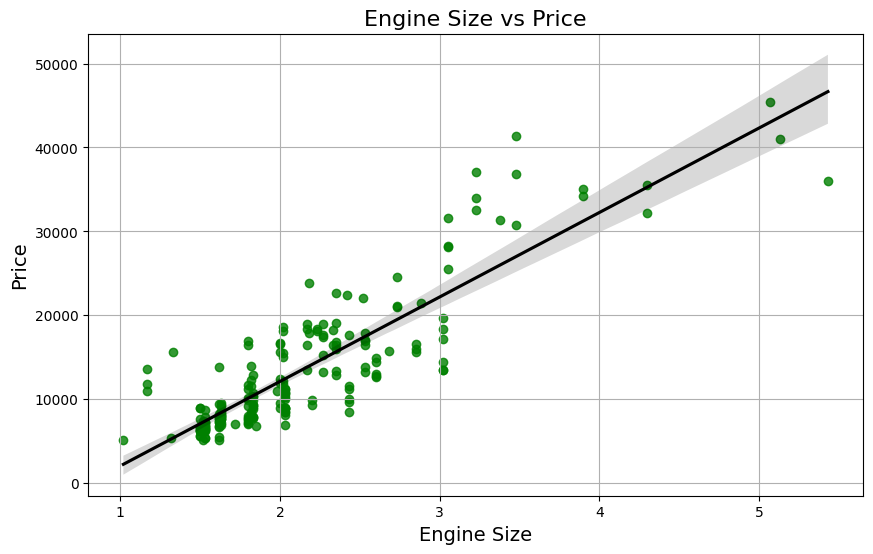

In [8]:
# seaborn regplot for enginesize vs price
plt.figure(figsize=(10, 6))
sns.regplot(
    x='enginesize', 
    y='price', 
    data=cars_df, 
    scatter_kws={'color': 'green'}, 
    line_kws={'color': 'black'}
)
plt.title('Engine Size vs Price', fontsize=16)
plt.xlabel('Engine Size', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.grid(True)
plt.show()

# Additional insights from the price vs engine size regplot:
1. The regplot provides a clearer visualization of the linear relationship between engine size and price, highlighting the strength and direction of the correlation.
2. The regression line allows us to observe the overall trend and estimate how much price increases per unit increase in engine size.
3. Outliers are more easily identified, showing cars with unusually high or low prices for their engine size.
4. The spread of data points around the regression line gives a sense of variability and potential heteroscedasticity (variance changes with engine size).
5. The regplot can reveal if there are clusters or gaps in the data, indicating possible segmentation in the market (e.g., economy vs luxury cars).

In [22]:
# plotly box plot for price by carbody and drivewheel
fig = px.box(
    cars_df, 
    x='carbody', 
    y='price', 
    color='drivewheel',
    title='Price Distribution by Car Body and Drive Wheels',
    color_discrete_sequence=px.colors.qualitative.Dark24
)
fig.update_layout(template='plotly_dark')
fig.show()


# Insights from Boxplot
- Hatchbacks have tightly grouped prices, indicating low price variability.
- Other car bodies (sedans, convertibles) show wider price ranges and more outliers.
- Hatchbacks are likely more standardized or budget-friendly.
- Greater price variability in other types suggests more market diversity.

In [23]:
# scatter plot with marginal for highway mpg vs city mpg
fig = px.scatter(
    cars_df, 
    x='highwaympg', 
    y='citympg', 
    color='drivewheel',
    title='Highway MPG vs City MPG colored by drivewheel',
    color_discrete_sequence=px.colors.qualitative.Dark24,
    marginal_x='box',
    marginal_y='box'
)
fig.update_layout(template='plotly_dark')
fig.show()


# The plot above highlights something new:
- FWD cars appear to cluster around the 30-40 mark suggesting this is the desired level of fuel economy for the average buyer
- RWD cars cluster around the lower end of the MPG chart suggesting that they are both not very fuel efficient and that performance buyers have MPG as less of a priority
- Saying this RWD do seem to correlate more positively with Highway MPG than City MPG, this could be because RWD cars have less of a struggle to maintain higher speeds therefore use less fuel
- It's difficult to discern where 4WD cars come into the mix due to them making up a smaller segment of the market but it doesn't look like MPG is a priority for this drivetrain, they're typically used as offroad cars and as work horses used to tow various cargo so their drivetrain is the priority

---

# Closing remarks



This exploratory data analysis notebook provided valuable insights into the relationships between car features and price, fuel efficiency, and market segmentation. By visualizing key variables such as engine size, horsepower, MPG, and car body types, we identified important trends and outliers that will inform future analysis and decision-making.

**Why this notebook was useful:**
- It helped uncover correlations and patterns in the cleaned dataset, such as the link between engine size and price, and the clustering of fuel efficiency by drivewheel type.
- The visualizations highlighted market segments (e.g., luxury vs. economy, performance vs. efficiency) and revealed variability within car categories.
- Outliers and data distributions were identified, guiding further data cleaning or feature engineering if needed.

**Next steps for dashboard creation:**
- Use the insights and visualizations from this notebook to design interactive dashboard components (e.g., filters for car body, drivewheel, price range).
- Incorporate key plots (pairplots, boxplots, scatter plots) to allow users to explore relationships and distributions dynamically.
- Add summary statistics and segmentation tools to help users compare car types and identify trends.
- Ensure the dashboard is user-friendly and highlights actionable insights for stakeholders, such as identifying value-for-money cars or market gaps.

This notebook serves as a strong foundation for building a data-driven dashboard that empowers users to explore and understand the car dataset effectively.

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
